# PLANT DISEASE PREDICTION USING RESNET 9 

Let's import required modules

In [1]:
import os # for working with files
import torch # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms # for transforming images into tensors 
from torchvision.utils import make_grid # for data checking
from torchvision.datasets import ImageFolder # for working with classes and images
%matplotlib inline

In [2]:
Data_Dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
Train_Dir = Data_Dir + "/train"
Valid_Dir = Data_Dir + "/valid"
Diseases = os.listdir(Train_Dir)
print(Diseases)
print(len(Diseases))

['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___Leaf_Mold', 'Tomato__

In [3]:
plants = []
NumberOfDiseases = 0
for plant in Diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1
print(plants)
print(len(plants))
print(NumberOfDiseases)

['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']
14
26


So we have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [4]:
# Number of images for each disease
nums = {}
for disease in Diseases:
    nums[disease] = len(os.listdir(Train_Dir + '/' + disease))
print(nums)

{'Tomato___Late_blight': 1851, 'Tomato___healthy': 1926, 'Grape___healthy': 1692, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Soybean___healthy': 2022, 'Squash___Powdery_mildew': 1736, 'Potato___healthy': 1824, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Tomato___Early_blight': 1920, 'Tomato___Septoria_leaf_spot': 1745, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1642, 'Strawberry___Leaf_scorch': 1774, 'Peach___healthy': 1728, 'Apple___Apple_scab': 2016, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1961, 'Tomato___Bacterial_spot': 1702, 'Apple___Black_rot': 1987, 'Blueberry___healthy': 1816, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Peach___Bacterial_spot': 1838, 'Apple___Cedar_apple_rust': 1760, 'Tomato___Target_Spot': 1827, 'Pepper,_bell___healthy': 1988, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722, 'Potato___Late_blight': 1939, 'Tomato___Tomato_mosaic_virus': 1790, 'Strawberry___healthy': 1824, 'Apple___healthy': 2008, 'Grape___Black_rot': 1888, 'Pota

While visualizing above information on graph

Text(0.5, 1.0, 'Images per each class of plant disease')

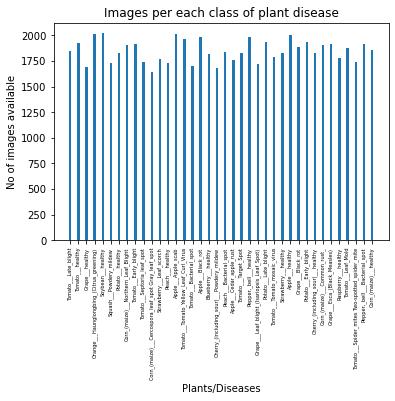

In [5]:
index = [n for n in range(38)]
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, Diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [6]:
add = 0
for val in nums.values():
    add += val
print(add)

70295


So there are 70295 images available for training.

In [7]:
# datasets for validation and training
train_ds = ImageFolder(Train_Dir, transform=transforms.ToTensor())
val_ds = ImageFolder(Valid_Dir, transform=transforms.ToTensor()) 

In [8]:
img, label = train_ds[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


In [9]:
train_ds.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train_ds.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

### Images from training dataset

Label :Apple___Apple_scab(0)


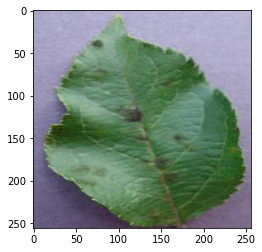

In [11]:
show_image(*train_ds[0])

Label :Tomato___healthy(37)


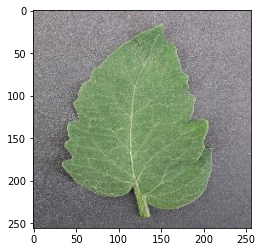

In [12]:
show_image(*train_ds[70000])

Label :Peach___Bacterial_spot(16)


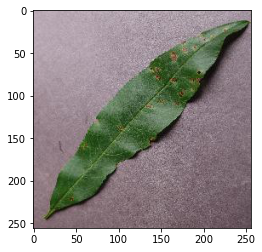

In [13]:
show_image(*train_ds[30000])

In [14]:
random_seed = 7
torch.manual_seed(random_seed)

In [15]:
batch_size = 32

In [16]:
# DataLoaders for training and validation
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=2, pin_memory=True)

In [17]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

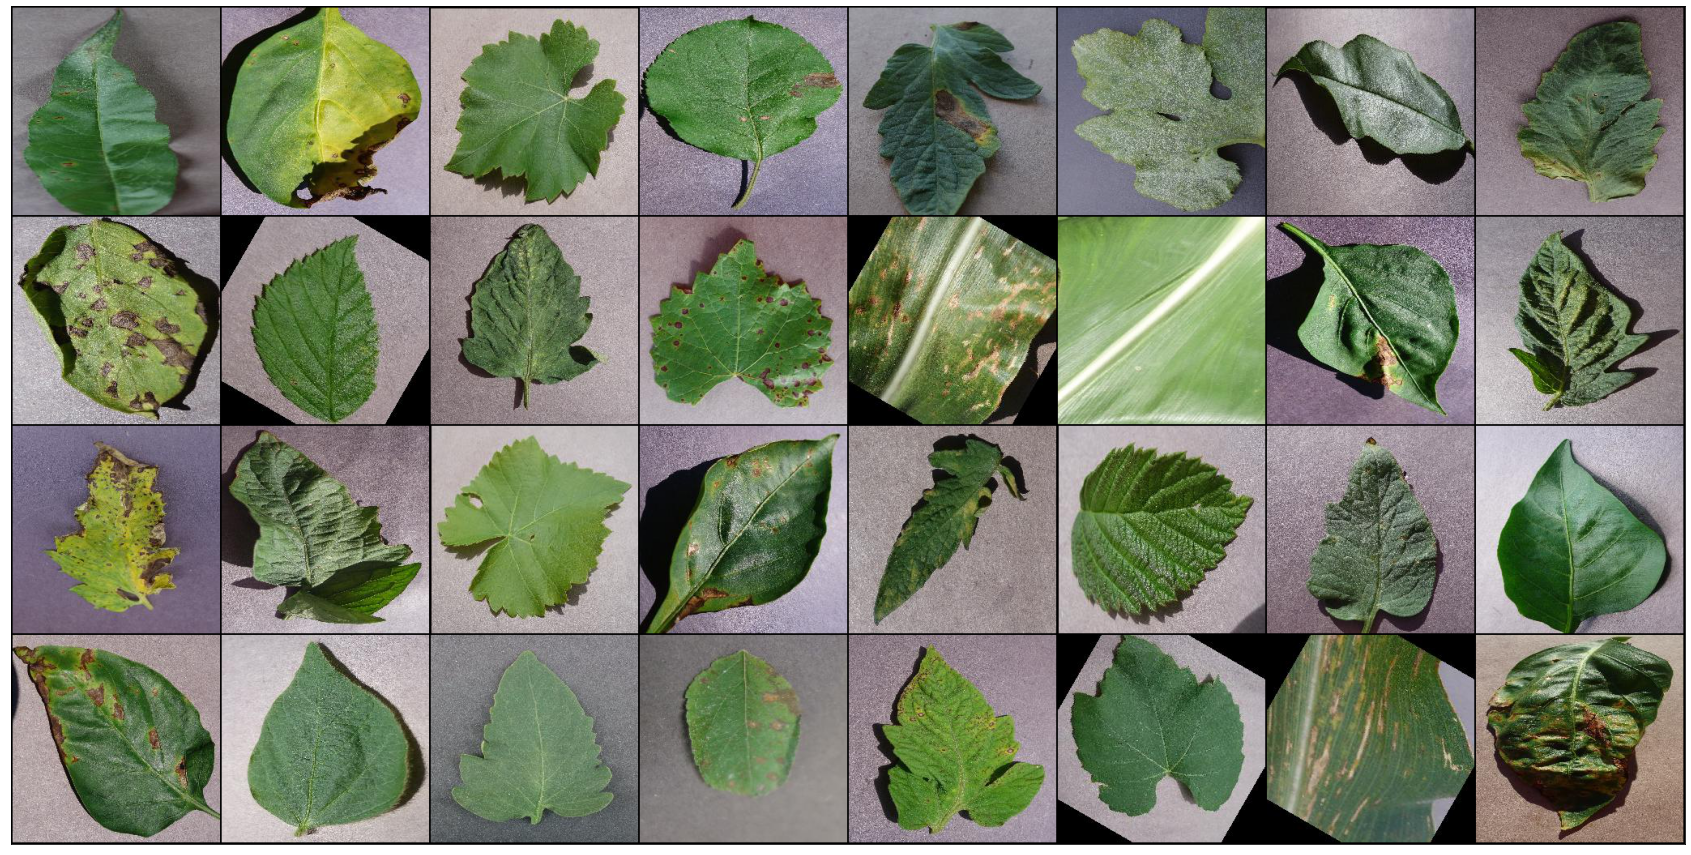

In [18]:
show_batch(train_dl) # Images for first batch of training

In [19]:
# for moving data into GPU
def get_default_device():
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader:
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        return len(self.dl)

In [20]:
device = get_default_device()
device

device(type='cuda')

In [21]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    

class DiseaseClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        accur = accuracy(out, labels)
        return {"val_loss": loss.detach(), "val_accuracy": accur}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

In [23]:
# Architecture for training
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


class ResNet9(DiseaseClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out
            
        

In [24]:
model = to_device(ResNet9(3, len(train_ds.classes)), device) # defining the model and moving it to the GPU
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [25]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
    

In [26]:
%%time
history = [evaluate(model, val_dl)]
history

CPU times: user 43.4 s, sys: 4.26 s, total: 47.6 s
Wall time: 1min 18s


[{'val_loss': tensor(3.6381, device='cuda:0'), 'val_accuracy': tensor(0.0258)}]

In [27]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [28]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, val_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00812, train_loss: 0.7495, val_loss: 0.4038, val_acc: 0.8739
Epoch [1], last_lr: 0.00000, train_loss: 0.1250, val_loss: 0.0282, val_acc: 0.9915
CPU times: user 11min 13s, sys: 6min 58s, total: 18min 12s
Wall time: 20min 4s


### Accuracy is 99.11 %

## Testing the model on test data

In [29]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

In [30]:
test_dir = "../input/new-plant-diseases-dataset/test"
test_ds = ImageFolder(test_dir, transform=transforms.ToTensor())

In [31]:
test_ds.classes

['test']

In [32]:
test_images = sorted(os.listdir(test_dir + '/test')) # since images in test folder are in alphabetical order
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [33]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

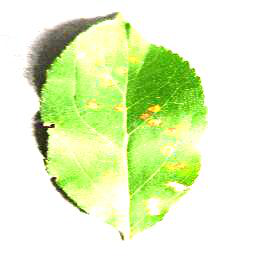

In [34]:
Image.open('../input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG')

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


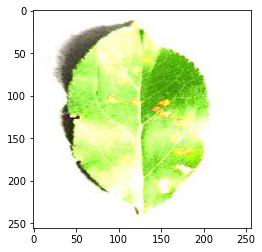

In [35]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust


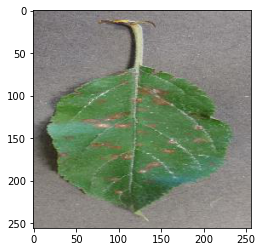

In [36]:
img, label = test_ds[1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[1], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust


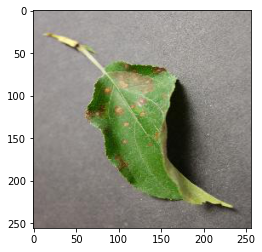

In [37]:
img, label = test_ds[2]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[2], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust


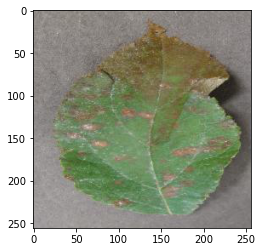

In [38]:
img, label = test_ds[3]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[3], ', Predicted:', predict_image(img, model))

Label: AppleScab1.JPG , Predicted: Apple___Apple_scab


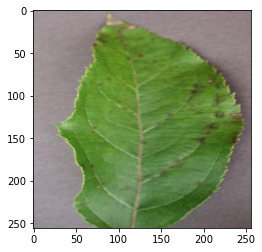

In [39]:
img, label = test_ds[4]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[4], ', Predicted:', predict_image(img, model))

Label: AppleScab2.JPG , Predicted: Apple___Apple_scab


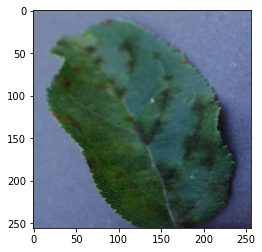

In [40]:
img, label = test_ds[5]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[5], ', Predicted:', predict_image(img, model))

Label: AppleScab3.JPG , Predicted: Apple___Apple_scab


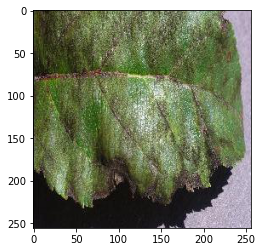

In [41]:
img, label = test_ds[6]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[6], ', Predicted:', predict_image(img, model))

Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_


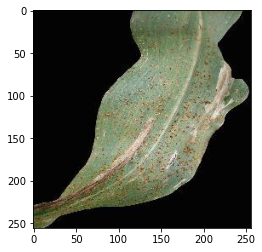

In [42]:
img, label = test_ds[7]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[7], ', Predicted:', predict_image(img, model))

Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_


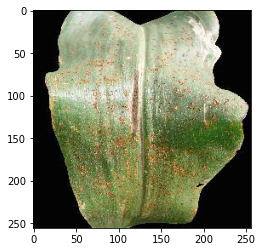

In [43]:
img, label = test_ds[8]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[8], ', Predicted:', predict_image(img, model))

Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_


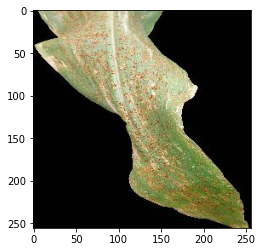

In [44]:
img, label = test_ds[9]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[9], ', Predicted:', predict_image(img, model))

Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight


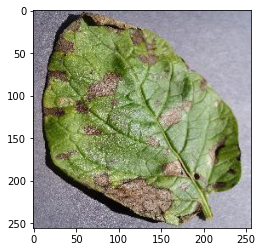

In [45]:
img, label = test_ds[10]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[10], ', Predicted:', predict_image(img, model))

Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight


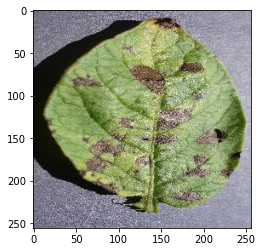

In [46]:
img, label = test_ds[11]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[11], ', Predicted:', predict_image(img, model))

Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight


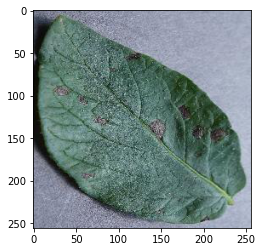

In [47]:
img, label = test_ds[12]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[12], ', Predicted:', predict_image(img, model))

Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight


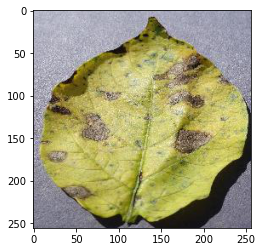

In [48]:
img, label = test_ds[13]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[13], ', Predicted:', predict_image(img, model))

Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight


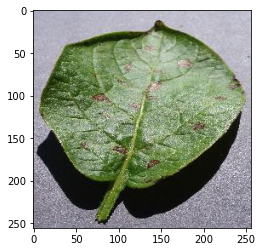

In [49]:
img, label = test_ds[14]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[14], ', Predicted:', predict_image(img, model))

Label: PotatoHealthy1.JPG , Predicted: Potato___healthy


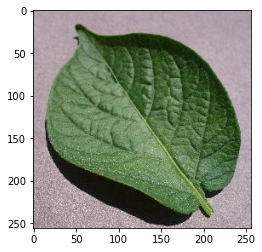

In [50]:
img, label = test_ds[15]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[15], ', Predicted:', predict_image(img, model))

Label: PotatoHealthy2.JPG , Predicted: Potato___healthy


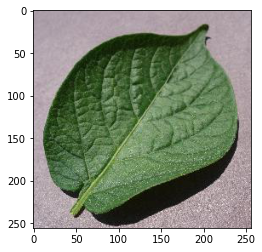

In [51]:
img, label = test_ds[16]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[16], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight1.JPG , Predicted: Tomato___Early_blight


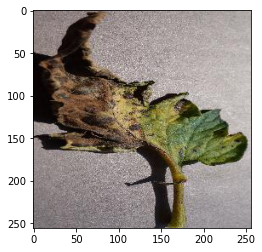

In [52]:
img, label = test_ds[17]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[17], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight2.JPG , Predicted: Tomato___Early_blight


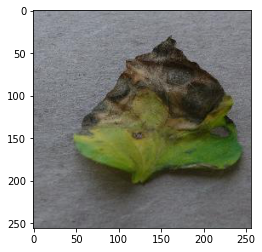

In [53]:
img, label = test_ds[18]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[18], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight3.JPG , Predicted: Tomato___Early_blight


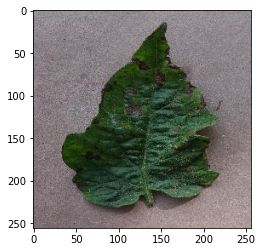

In [54]:
img, label = test_ds[19]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[19], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight4.JPG , Predicted: Tomato___Early_blight


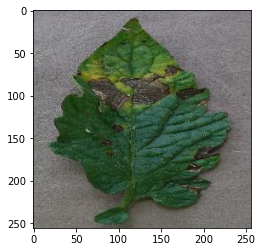

In [55]:
img, label = test_ds[20]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[20], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight5.JPG , Predicted: Tomato___Early_blight


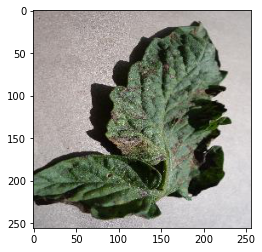

In [56]:
img, label = test_ds[21]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[21], ', Predicted:', predict_image(img, model))

Label: TomatoEarlyBlight6.JPG , Predicted: Tomato___Early_blight


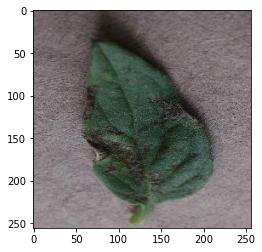

In [57]:
img, label = test_ds[22]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[22], ', Predicted:', predict_image(img, model))

Label: TomatoHealthy1.JPG , Predicted: Tomato___healthy


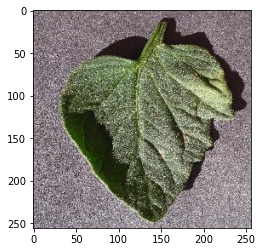

In [58]:
img, label = test_ds[23]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[23], ', Predicted:', predict_image(img, model))

Label: TomatoHealthy2.JPG , Predicted: Tomato___healthy


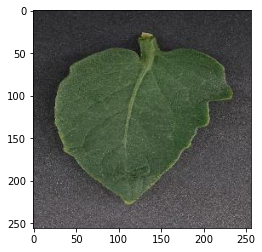

In [59]:
img, label = test_ds[24]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[24], ', Predicted:', predict_image(img, model))

Label: TomatoHealthy3.JPG , Predicted: Tomato___healthy


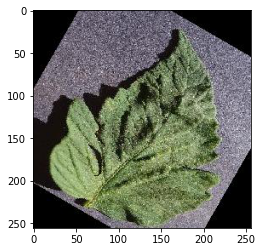

In [60]:
img, label = test_ds[25]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[25], ', Predicted:', predict_image(img, model))

Label: TomatoHealthy4.JPG , Predicted: Tomato___healthy


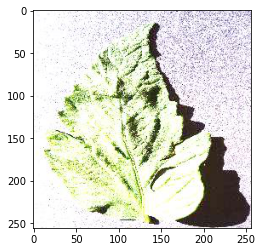

In [61]:
img, label = test_ds[26]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[26], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus1.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


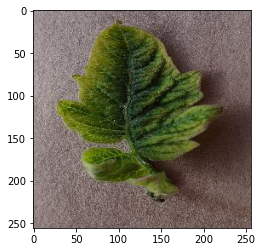

In [62]:
img, label = test_ds[27]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[27], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus2.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


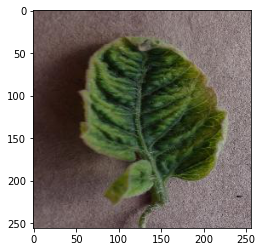

In [63]:
img, label = test_ds[28]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[28], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus3.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


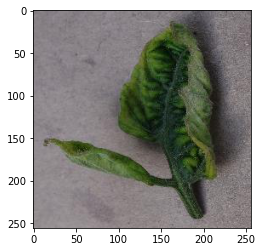

In [64]:
img, label = test_ds[29]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[29], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus4.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


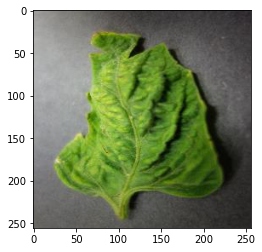

In [65]:
img, label = test_ds[30]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[30], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus5.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


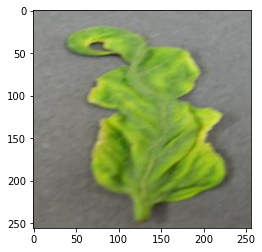

In [66]:
img, label = test_ds[31]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[31], ', Predicted:', predict_image(img, model))

Label: TomatoYellowCurlVirus6.JPG , Predicted: Tomato___Tomato_Yellow_Leaf_Curl_Virus


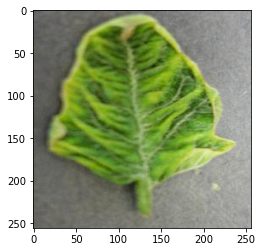

In [67]:
img, label = test_ds[32]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[32], ', Predicted:', predict_image(img, model))

In [68]:
torch.save(model.state_dict(), 'plant_disease_model.pth')

#### It is able to predict every image from the test data correctly